# **Data Visiualization**

source:

GFQA_v2: 
Published November 27, 2024
https://zenodo.org/records/14230628

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load datasets

In [2]:
df_all = pd.read_csv("final_dataset.csv")
df_pivot = pd.read_csv("pivot_dataset.csv")

C:\Users\Informatics\AppData\Local\Temp\ipykernel_10644\3011022723.py:2: DtypeWarning: Columns (5,6,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pivot = pd.read_csv("pivot_dataset.csv")


## **Distribution of quality per parameter**

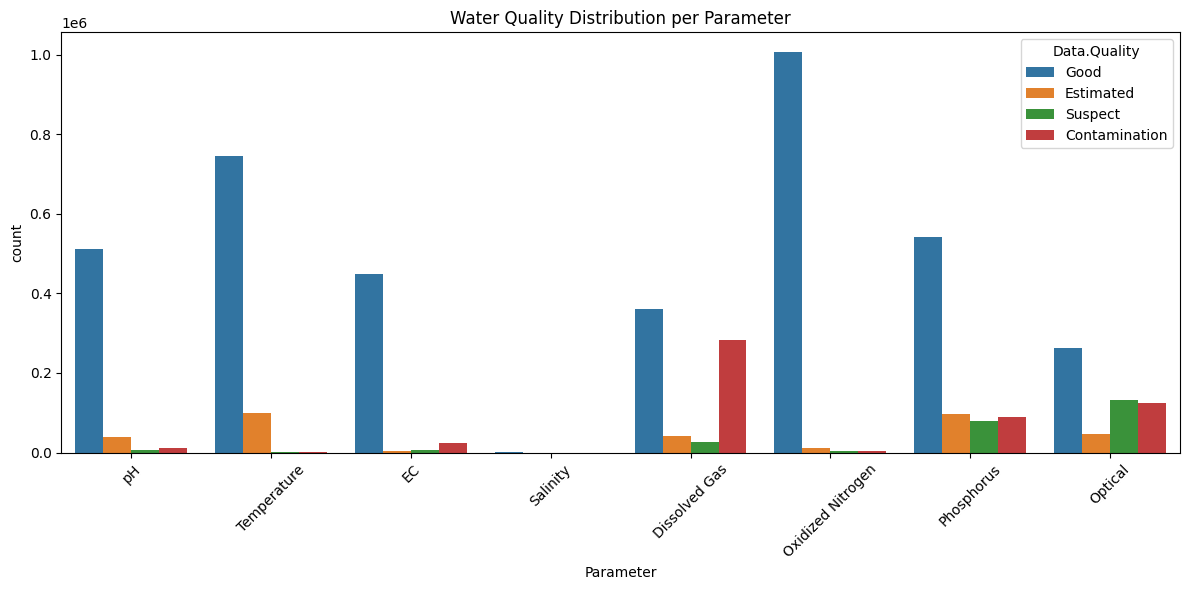

In [3]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_all,
    x='Parameter',
    hue='Data.Quality',
    order=df_all['Parameter'].unique()
)
plt.xticks(rotation=45)
plt.title('Water Quality Distribution per Parameter')
plt.tight_layout()
plt.show()

## **Percentage view**

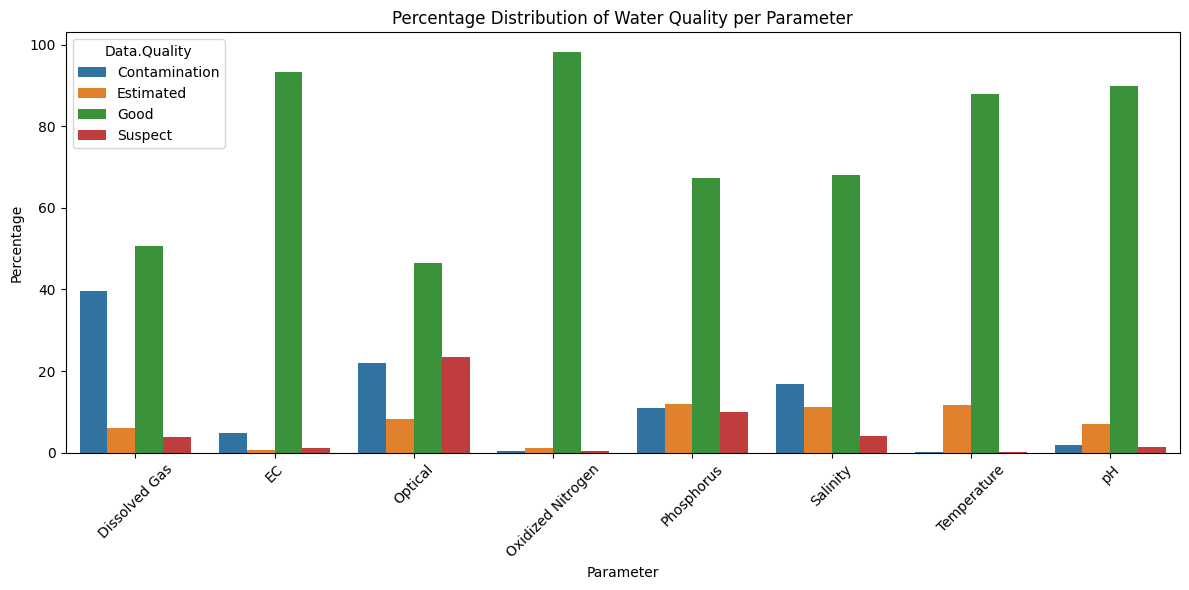

In [4]:
prop = (
    df_all
    .groupby(['Parameter', 'Data.Quality'])
    .size()
    .reset_index(name='Count')
)

# compute percentages per parameter
prop['Percentage'] = (
    prop.groupby('Parameter')['Count']
    .transform(lambda x: 100 * x / x.sum())
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=prop,
    x='Parameter',
    y='Percentage',
    hue='Data.Quality'
)
plt.xticks(rotation=45)
plt.title('Percentage Distribution of Water Quality per Parameter')
plt.tight_layout()
plt.show()

# **Temporal evolution**

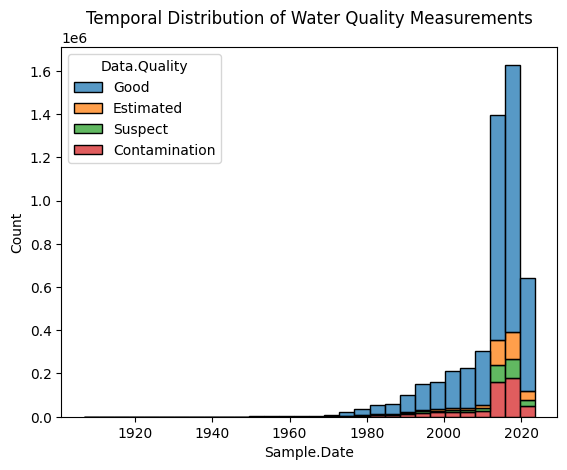

In [5]:
df_all['Sample.Date'] = pd.to_datetime(df_all['Sample.Date'])

sns.histplot(
    data=df_all,
    x='Sample.Date',
    hue='Data.Quality',
    multiple='stack',
    bins=30
)
plt.title('Temporal Distribution of Water Quality Measurements')
plt.show()

## **Final quality distribution**

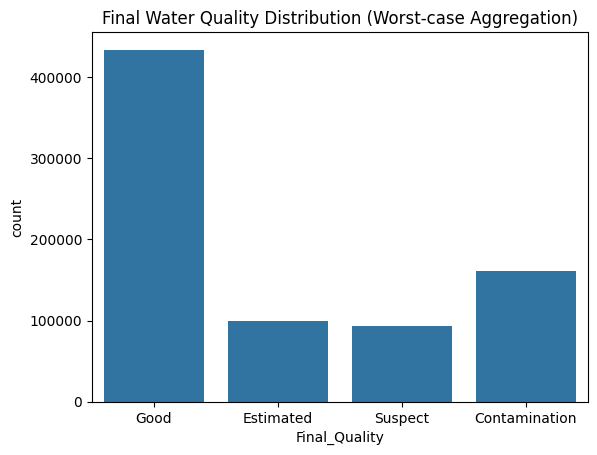

In [6]:
sns.countplot(data=df_pivot, x='Final_Quality',
              order=['Good','Estimated','Suspect','Contamination'])
plt.title('Final Water Quality Distribution (Worst-case Aggregation)')
plt.show()

# **Binary target balance**

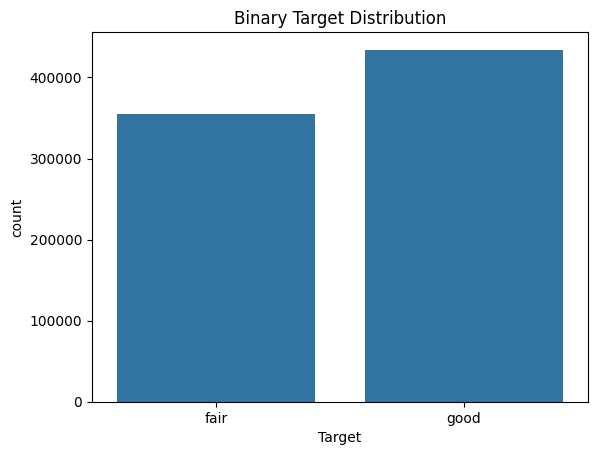

In [7]:
sns.countplot(data=df_pivot, x='Target')
plt.title('Binary Target Distribution')
plt.show()

## **Heatmap: parameters vs final quality**

C:\Users\Informatics\AppData\Local\Temp\ipykernel_10644\405006821.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded = df_pivot[param_cols].replace({


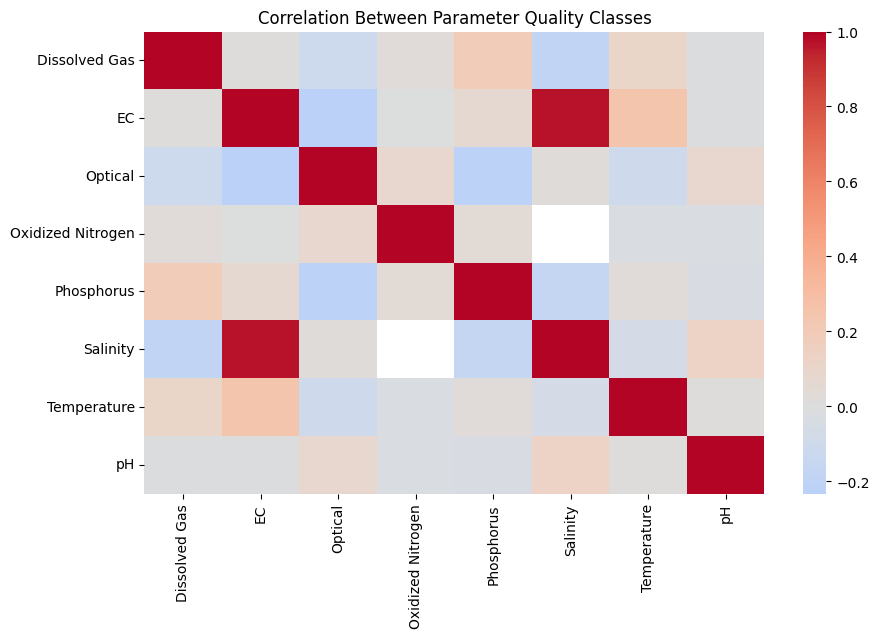

In [8]:
param_cols = [c for c in df_pivot.columns 
              if c not in ['GEMS.Station.Number','Sample.Date','Sample.Time',
                           'Depth','Final_Quality','Target']]

encoded = df_pivot[param_cols].replace({
    'Good':0, 'Estimated':1, 'Suspect':2, 'Contamination':3
})

plt.figure(figsize=(10,6))
sns.heatmap(encoded.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Between Parameter Quality Classes')
plt.show()
